In [14]:
from sklearn.linear_model import LinearRegression
import pandas as pd

from sklearn.model_selection import train_test_split

In [15]:
#!pip install tensorflow

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    

X_train = open_images("./Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")

y_train = open_labels("./Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0


X_test = open_images("./Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")

y_test = open_labels("./Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

y_test = y_test == 0


In [28]:
y_train

array([ True, False, False, ...,  True, False,  True])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd",loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train.reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
model.fit(X_train.reshape(60000,784),
         y_train,
          epochs=10,
          batch_size=1000
         )

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8019 - loss: 0.4251
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9043 - loss: 0.2022
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9291 - loss: 0.1777
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9436 - loss: 0.1595
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9473 - loss: 0.1489
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9508 - loss: 0.1410
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.1350
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1316
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9535 - loss: 0.1277
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9541 - loss: 0.1238


## Evaluieren bzw testen des Models

In [29]:
model.evaluate(X_test.reshape(10000,784),  y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.1238


[0.12737782299518585, 0.9539999961853027]

In [12]:
model.evaluate?

In [13]:
print(model.metrics_names)

['loss', 'compile_metrics']


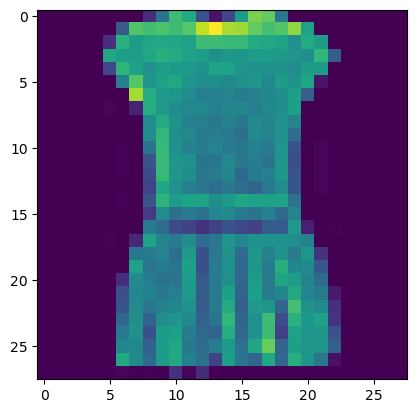

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(test_d)
plt.show()

In [41]:
model.predict(test_d.reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.25264925]], dtype=float32)